# MAT281 - Laboratorio N°10



<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0}) # target 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

1. Realice un análisis exploratorio del conjunto de datos.
1. Normalizar las variables numéricas con el método **StandardScaler**.
3. Realizar un método de reducción de dimensionalidad visto en clases.
4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.




# Pregunta 1
Realice un análisis exploratorio del conjunto de datos.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
diagnosis,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
data = df.iloc[:, 2:32]

In [7]:
data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
num_cols = [col for col in data.columns if data[col].dtype in [int, float]]
corr = data[num_cols].corr()

In [9]:
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


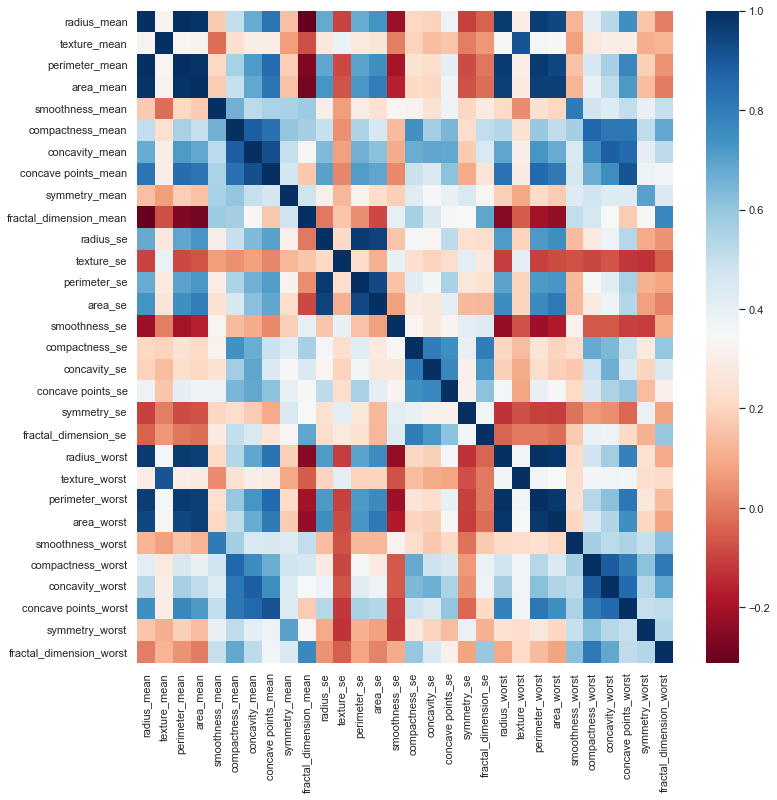

In [10]:
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

In [11]:
# quitamos las altas correlaciones. puesto que no son muy importantes analizarlas
pd.set_option('display.max_columns', 5)

corr_matrix = data.corr().abs()

In [12]:
corr_matrix

,radius_mean,texture_mean,...,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,...,0.163953,0.007066
texture_mean,0.323782,1.000000,...,0.105008,0.119205
perimeter_mean,0.997855,0.329533,...,0.189115,0.051019
area_mean,0.987357,0.321086,...,0.143570,0.003738
smoothness_mean,0.170581,0.023389,...,0.394309,0.499316
compactness_mean,0.506124,0.236702,...,0.510223,0.687382
concavity_mean,0.676764,0.302418,...,0.409464,0.514930
concave points_mean,0.822529,0.293464,...,0.375744,0.368661
symmetry_mean,0.147741,0.071401,...,0.699826,0.438413
fractal_dimension_mean,0.311631,0.076437,...,0.334019,0.767297


In [13]:
# usaremos una trigular, ya sea la superior o inferior, puesto que son lo mismo.
upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [14]:
upper_triangle_matrix

,radius_mean,texture_mean,...,symmetry_worst,fractal_dimension_worst
radius_mean,NaN,0.323782,...,0.163953,0.007066
texture_mean,NaN,NaN,...,0.105008,0.119205
perimeter_mean,NaN,NaN,...,0.189115,0.051019
area_mean,NaN,NaN,...,0.143570,0.003738
smoothness_mean,NaN,NaN,...,0.394309,0.499316
compactness_mean,NaN,NaN,...,0.510223,0.687382
concavity_mean,NaN,NaN,...,0.409464,0.514930
concave points_mean,NaN,NaN,...,0.375744,0.368661
symmetry_mean,NaN,NaN,...,0.699826,0.438413
fractal_dimension_mean,NaN,NaN,...,0.334019,0.767297


In [15]:
# dropeamos las variables no necesarias
drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > 0.90)]

In [16]:
corr_matrix[drop_list]

,perimeter_mean,area_mean,...,area_worst,concave points_worst
radius_mean,0.997855,0.987357,...,0.941082,0.744214
texture_mean,0.329533,0.321086,...,0.343546,0.295316
perimeter_mean,1.000000,0.986507,...,0.941550,0.771241
area_mean,0.986507,1.000000,...,0.959213,0.722017
smoothness_mean,0.207278,0.177028,...,0.206718,0.503053
compactness_mean,0.556936,0.498502,...,0.509604,0.815573
concavity_mean,0.716136,0.685983,...,0.675987,0.861323
concave points_mean,0.850977,0.823269,...,0.809630,0.910155
symmetry_mean,0.183027,0.151293,...,0.177193,0.430297
fractal_dimension_mean,0.261477,0.283110,...,0.231854,0.175325


In [17]:
# dropeamos al df original el drop_list de lo anterior
data.drop(drop_list, axis=1)

,radius_mean,texture_mean,...,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,...,0.4601,0.11890
1,20.57,17.77,...,0.2750,0.08902
2,19.69,21.25,...,0.3613,0.08758
3,11.42,20.38,...,0.6638,0.17300
4,20.29,14.34,...,0.2364,0.07678
...,...,...,...,...,...
564,21.56,22.39,...,0.2060,0.07115
565,20.13,28.25,...,0.2572,0.06637
566,16.60,28.08,...,0.2218,0.07820
567,20.60,29.33,...,0.4087,0.12400


In [18]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

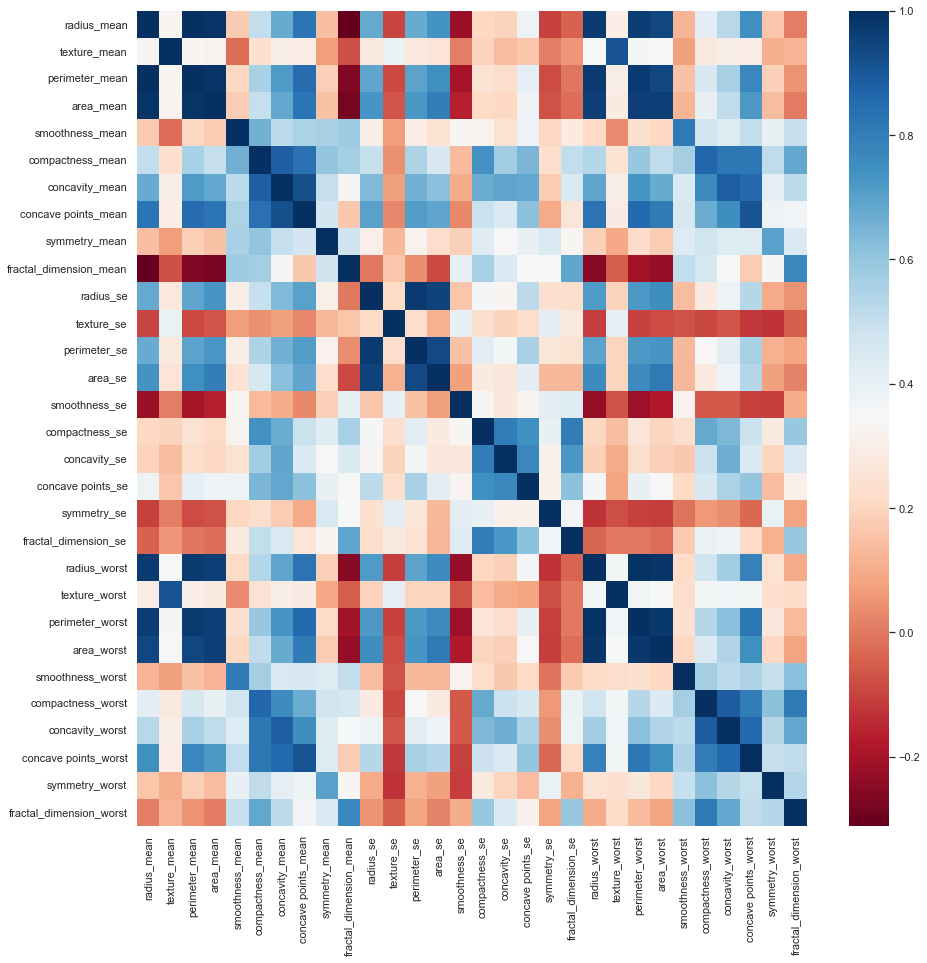

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [19]:
high_correlated_cols(data, plot=True)

In [20]:
drop_list = high_correlated_cols(data)
df_util = data.drop(drop_list, axis=1)

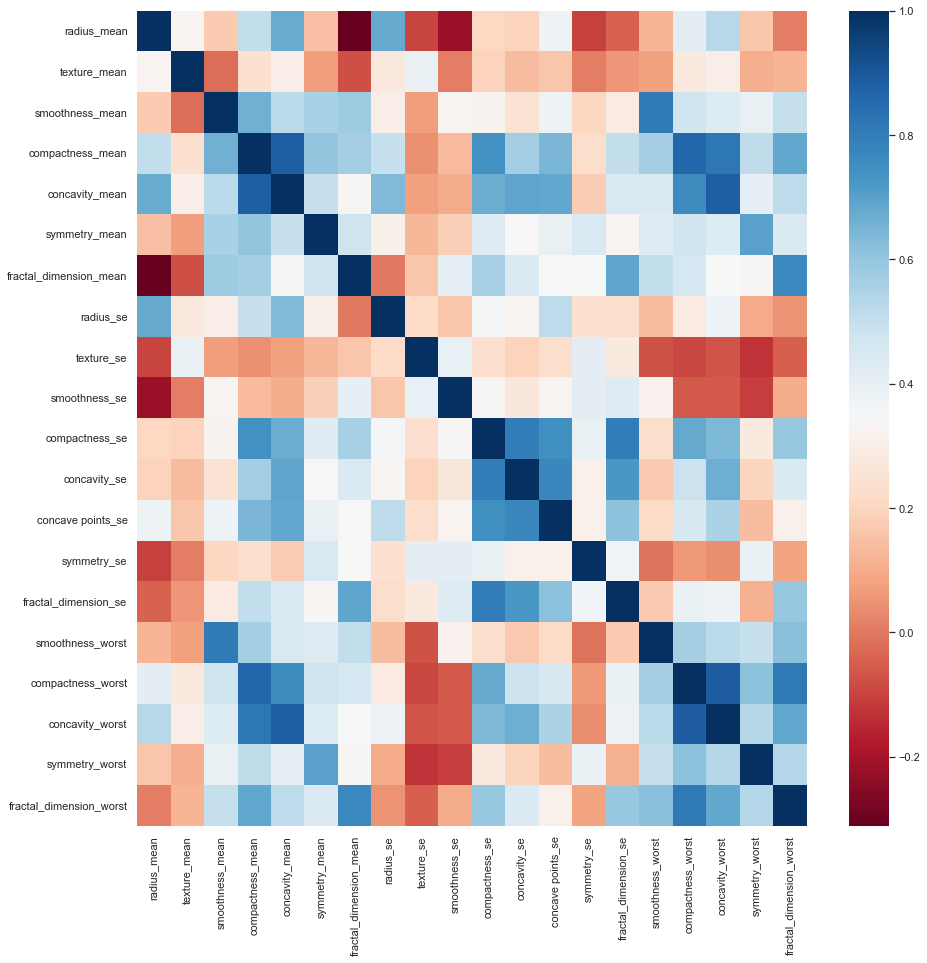

[]

In [21]:
high_correlated_cols(df_util, plot=True)

# Pregunta 2
Normalizar las variables numéricas con el método **StandardScaler**.

In [22]:
standard_df = (df_util
               .select_dtypes(include=['int64','float64'])
               #.drop(['id','diagnosis'],axis=1) #Se dropean columnas ya standarizadas. 
              )
#Se estandariza mediante StandarScaler:
standard_df[standard_df.columns] = StandardScaler().fit_transform(standard_df[standard_df.columns])
standard_df

,radius_mean,texture_mean,...,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,...,2.750622,1.937015
1,1.829821,-0.353632,...,-0.243890,0.281190
2,1.579888,0.456187,...,1.152255,0.201391
3,-0.768909,0.253732,...,6.046041,4.935010
4,1.750297,-1.151816,...,-0.868353,-0.397100
...,...,...,...,...,...
564,2.110995,0.721473,...,-1.360158,-0.709091
565,1.704854,2.085134,...,-0.531855,-0.973978
566,0.702284,2.045574,...,-1.104549,-0.318409
567,1.838341,2.336457,...,1.919083,2.219635


# Pregunta 3
Realizar un método de reducción de dimensionalidad visto en clases

In [23]:
# se trabajara con standar_scale
# PCA
X = standard_df
y = df['diagnosis']

    
embedding = PCA(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_pca = pd.DataFrame(X_transform,columns = ['Score1','Score2'])
df_pca['diagnosis'] = y

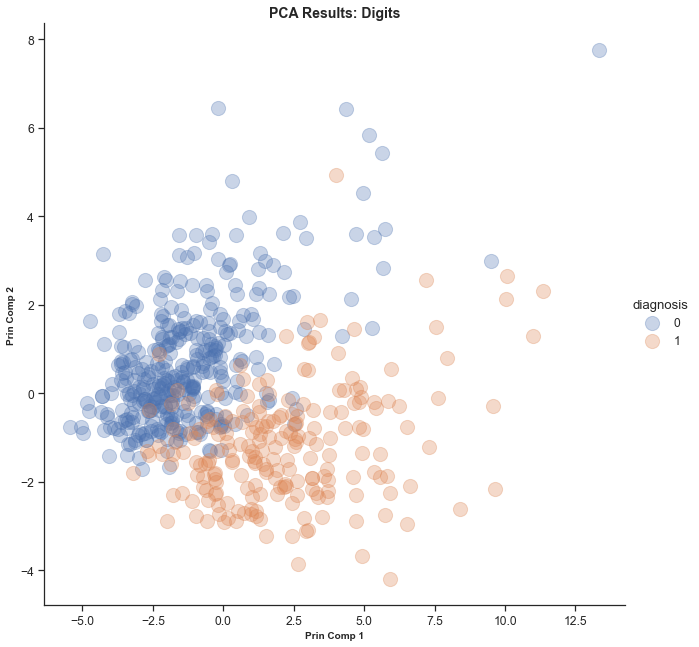

In [24]:
# Plot Digits PCA
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='Score1',
           y='Score2',
           data=df_pca,
           fit_reg=False,
           legend=True,
           height=9,
           hue='diagnosis',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

# Pregunta 4
Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.

In [25]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

## Regresion Logistica

In [26]:
# Estratificamos la data (70%train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(df_pca.drop(['diagnosis'], axis=1), y, test_size=0.30, random_state=40)

In [27]:
def simple_logistic_classify(X_train, y_train, X_test, y_test, _C=1.0):
    model = LogisticRegression(C=_C).fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    print('Test Score con 2 features post-PCA', score)
    print('-----------------------------------')
    
    y_true =  list(y_test)
    y_pred = list(model.predict(X_test)) # predicciones con random forest


    print('\nMatriz de confusion:\n ')
    print(confusion_matrix(y_true, y_pred))

    print('\nMetricas:\n ')
    print('accuracy:   ',accuracy_score(y_true,y_pred))
    print('recall:     ',recall_score(y_true,y_pred))
    print('precision:  ',precision_score(y_true,y_pred))
    print('f-score:    ',f1_score(y_true,y_pred))
    print("")
    return model

In [28]:
lala = simple_logistic_classify(X_train, y_train, X_test, y_test, _C=1.0)

Test Score con 2 features post-PCA 0.9532163742690059
-----------------------------------

Matriz de confusion:
 
[[111   4]
 [  4  52]]

Metricas:
 
accuracy:    0.9532163742690059
recall:      0.9285714285714286
precision:   0.9285714285714286
f-score:     0.9285714285714286



## Regresion Bayesiana

In [29]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_pca.drop(['diagnosis'], axis=1), y, test_size=0.30, random_state=40)

In [30]:
from sklearn.model_selection import StratifiedKFold

model_bi = MultinomialNB().fit(X_train2.abs(), y_train2)   

# metrics

y_true2 =  list(y_test2)
y_pred2 = list(model_bi.predict(X_test2)) # predicciones con random forest


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true2, y_pred2))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_true2,y_pred2))
print('recall:     ',recall_score(y_true2,y_pred2))
print('precision:  ',precision_score(y_true2,y_pred2))
print('f-score:    ',f1_score(y_true2,y_pred2))
print("")




Matriz de confusion:
 
[[115   0]
 [ 56   0]]

Metricas:
 
accuracy:    0.672514619883041
recall:      0.0
precision:   0.0
f-score:     0.0



## RandomForest

In [31]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_pca.drop(['diagnosis'], axis=1), y, test_size=0.30, random_state=40)

In [32]:
rfc =  RandomForestClassifier().fit(X_train3, y_train3)

In [33]:
# metrics

y_true3 =  list(y_test3)
y_pred3 = list(rfc.predict(X_test3)) # predicciones con random forest


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true3, y_pred3))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_true3,y_pred3))
print('recall:     ',recall_score(y_true3,y_pred3))
print('precision:  ',precision_score(y_true3,y_pred3))
print('f-score:    ',f1_score(y_true3,y_pred3))
print("")


Matriz de confusion:
 
[[109   6]
 [ 10  46]]

Metricas:
 
accuracy:    0.9064327485380117
recall:      0.8214285714285714
precision:   0.8846153846153846
f-score:     0.8518518518518519



## Decision Tree

In [34]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(df_pca.drop(['diagnosis'], axis=1), y, test_size=0.30, random_state=40)

In [35]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()

model_tree.fit(X_train4, y_train4)
dt_pred = model_tree.predict(X_test4)


In [36]:
# metrics

y_true4 =  list(y_test4)
y_pred4 = list(dt_pred) # predicciones con random forest


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true4, y_pred4))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_true4,y_pred4))
print('recall:     ',recall_score(y_true4,y_pred4))
print('precision:  ',precision_score(y_true4,y_pred4))
print('f-score:    ',f1_score(y_true4,y_pred4))
print("")


Matriz de confusion:
 
[[100  15]
 [ 10  46]]

Metricas:
 
accuracy:    0.8538011695906432
recall:      0.8214285714285714
precision:   0.7540983606557377
f-score:     0.7863247863247863



**Conclusión**: Notemos que el mejor modelo para la predicción del cáncer de mama es el regresor logistico, puesto que la cantidad de falsos positivos y falsos negativos son muy bajas comparadas con el resto.